In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import psycopg2 as pst 
import datetime as dt

In [3]:
#now=datetime.datetime.now()
now = pd.Timestamp('now') 

In [4]:
radm_reg=pd.read_excel('HospitalDatabase.xlsx',sheet_name='ReAdmissionRegistry')
edvisits=pd.read_excel('HospitalDatabase.xlsx',sheet_name='EDVisits')
patients=pd.read_excel('HospitalDatabase.xlsx',sheet_name='Patients')
ambulatoryvisits=pd.read_excel('HospitalDatabase.xlsx',sheet_name='AmbulatoryVisits')
discharges=pd.read_excel('HospitalDatabase.xlsx',sheet_name='Discharges')
providers=pd.read_excel('HospitalDatabase.xlsx',sheet_name='Providers')
edunique=pd.read_excel('HospitalDatabase.xlsx',sheet_name='EDUnique')

In [5]:
#radm_reg=pd.read_excel('ReadmissionRegistryExcel.xlsx') Krishna
#edvisits=pd.read_excel('QualityDataset.xlsx',sheet_name='EDVisits')
#patients=pd.read_excel('QualityDataset.xlsx',sheet_name='Patients')
#ambulatoryvisits=pd.read_excel('QualityDataset.xlsx',sheet_name='AmbulatoryVisits')
#discharges=pd.read_excel('QualityDataset.xlsx',sheet_name='Discharges')
#providers=pd.read_excel('QualityDataset.xlsx',sheet_name='Providers')

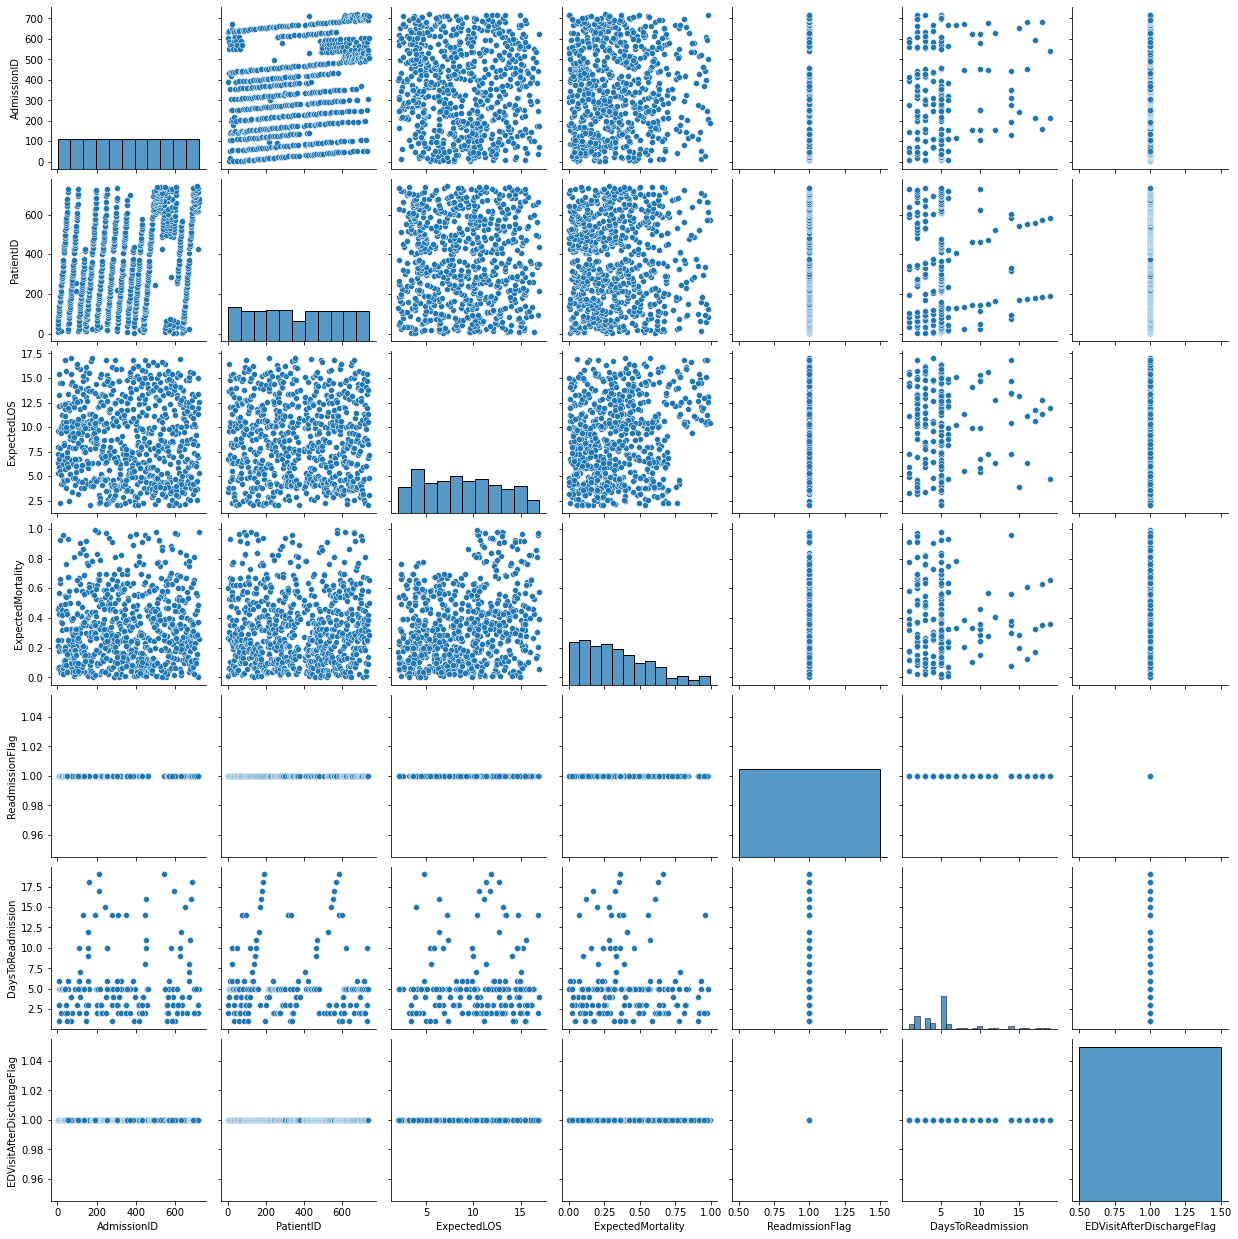

In [6]:
# 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.
sns.pairplot(radm_reg,palette='coolwarm')

In [7]:
#2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200
patients.iloc[100:200,1:3] 

,FirstName,LastName
100,Calla,Wasiela
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
...,...,...
195,Cathlene,Kidwell
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun


Text(0.5, 1.0, 'title')

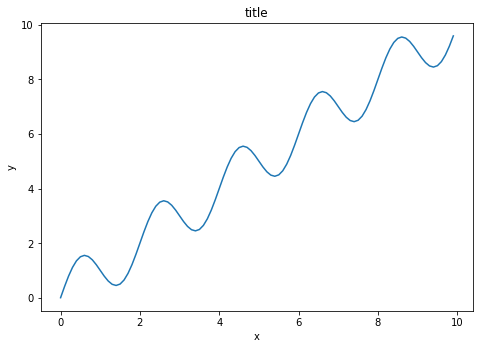

In [8]:
#3.Create a figure object called fig using plt.figure() **
# ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
 #** Plot (x,y) on that axes and set the labels.
# Note : You can plot on any x,y set of values.
fig = plt.figure()
x = np.arange(0, 10, 0.1) 
y = np.sin(np.pi * x) + x
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y) 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
ax.set_title('title')


In [9]:
#4.Display Data By splitting age in 4 quartiles and labeling the quartiles.
#patients['Dates'] = pd.to_datetime(patients['DateOfBirth']) 
patients['Age'] = (now - patients['DateOfBirth']).astype('<m8[Y]') 
patients['Age1'] = pd.qcut(patients['Age'],[0,0.25,0.5,0.75,1],labels = ['0-25%','26-50%', '51-75%', '76-100%']) 
patients 

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age1
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0,76-100%
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0,0-25%
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,26-50%
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0,51-75%
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,76-100%
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36.0,0-25%
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52.0,51-75%
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39.0,0-25%
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59.0,76-100%


In [10]:
patients[(patients['DateOfBirth']).dt. year == 1986]['FirstName']  + patients[(patients['DateOfBirth']).dt.year == 1986]['LastName']

23         Gabriel Joseph
24         Lincoln Brenda
29             AlaHalpert
72            LolitaDarci
164         FadelBernardt
238         BentleyKippax
367            ValeOlanda
373          BrittDureden
386       CristabelChatel
415       ConstantiaGroup
452       MorganScrowston
561             DomBaglow
568        IgnazioMelling
595         HomenickRings
639           HashimSlark
643       EllieRamsbotham
674        LlewellynGroup
714             NilesShaw
733             YvetteInc
777          SiouxieGroup
852            CarlyGroup
868        WorthPickering
877           ArniBaldack
909       KuvalisCoupland
922    RebbeccaRollingson
940            WatFideler
dtype: object

In [11]:
#5 Display full name of patients who are born in 1986
patients[(patients['DateOfBirth']).dt. year == 1986]['FirstName']  + patients[(patients['DateOfBirth']).dt.year == 1986]['LastName']

23         Gabriel Joseph
24         Lincoln Brenda
29             AlaHalpert
72            LolitaDarci
164         FadelBernardt
238         BentleyKippax
367            ValeOlanda
373          BrittDureden
386       CristabelChatel
415       ConstantiaGroup
452       MorganScrowston
561             DomBaglow
568        IgnazioMelling
595         HomenickRings
639           HashimSlark
643       EllieRamsbotham
674        LlewellynGroup
714             NilesShaw
733             YvetteInc
777          SiouxieGroup
852            CarlyGroup
868        WorthPickering
877           ArniBaldack
909       KuvalisCoupland
922    RebbeccaRollingson
940            WatFideler
dtype: object

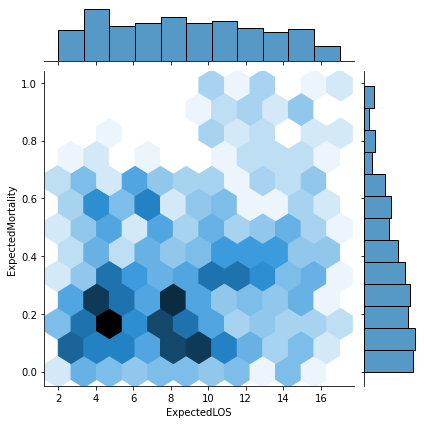

In [12]:
#6.Create a jointplot on expected mortality & expected length of stay
sns.jointplot(x='ExpectedLOS',y='ExpectedMortality', data=radm_reg,kind='hex')

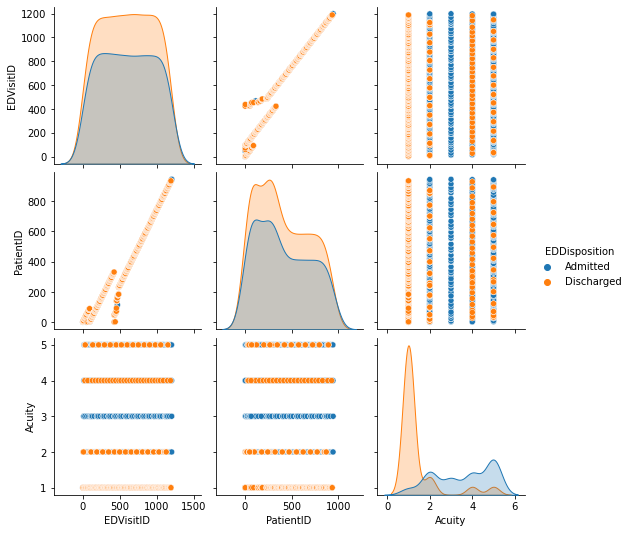

In [13]:
#7.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.
sns.pairplot(edvisits,hue='EDDisposition') 

<BarContainer object of 720 artists>

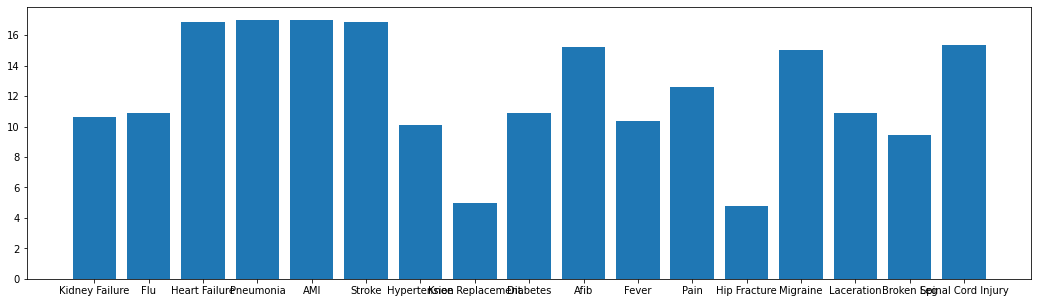

In [14]:
# 8. Create a bar chart between expectedLOS & Primary diagnosis.
plt.figure(figsize=(18,5)) 
plt.bar(radm_reg['PrimaryDiagnosis'], radm_reg['ExpectedLOS']) 

In [15]:
#9.Get the list of patient ids which are not there in ReadmissionRegistry
p1=patients['PatientID'] 
p2=radm_reg['PatientID'] 
p1[~p1.isin(p2)] 

3        4
134    135
144    145
188    189
199    200
      ... 
940    941
941    942
942    943
943    944
944    945
Name: PatientID, Length: 241, dtype: int64

<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

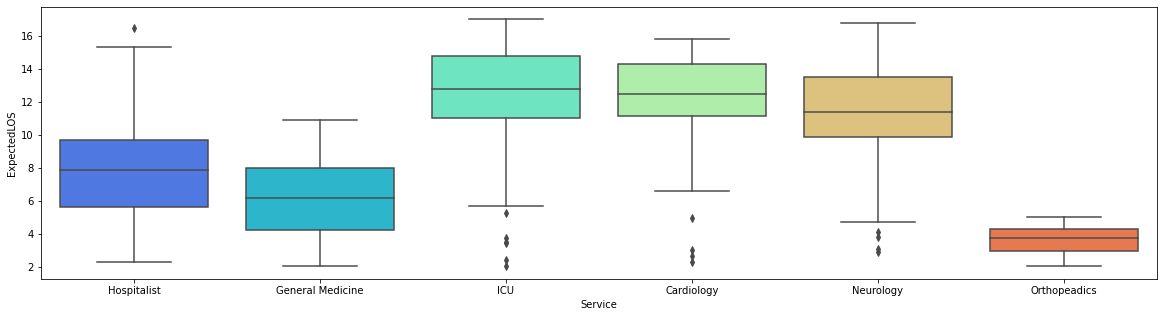

In [16]:
#10.Create a boxplot on ExpectedLOS by taking service into account
plt.figure(figsize=(20,5))
sns.boxplot(x='Service',y='ExpectedLOS',data=radm_reg, palette='rainbow')

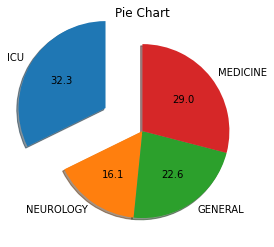

In [17]:
#11.Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] & EcpectedLOS=[10,5,7,9]
#&explode the wedge with highest LOS.
Service= ["ICU", "NEUROLOGY", "GENERAL", "MEDICINE"] 
ExpectedLOS=[10,5,7,9] 
outside = (0.5, 0, 0, 0) 
plt.pie(ExpectedLOS, labels=Service, explode=outside, autopct="%.1f", shadow=True, startangle=90)
plt.title("Pie Chart") 
plt.show() 

In [22]:
#.12 Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T.
import psycopg2 as pst 
conn= pst.connect("dbname='Hospitaldatabase.xl' user=postgres password=J@ihind9843") 
df=pd.read_sql("""select * from "Providers" where "ProviderName" like 'T%' """,conn) 
df

OperationalError: connection to server at "localhost" (::1), port 5432 failed: FATAL:  password authentication failed for user "postgres"


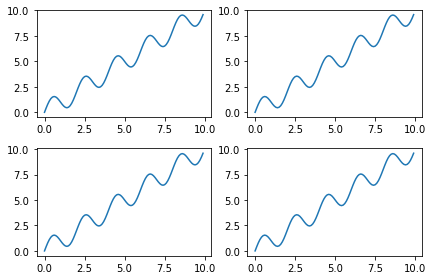

In [23]:
#13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach
fig,axes=plt.subplots(nrows=2,ncols=2)
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
axes[0][0].plot(x,y) 
axes[0][1].plot(x,y) 
axes[1][0].plot(x,y) 
axes[1][1].plot(x,y) 
plt.tight_layout()

In [24]:
#14. Find the number of null values in BloodPressureSystolic column.
ambulatoryvisits['BloodPressureSystolic'].isnull().sum()

124

In [25]:
#15.Replace all the null values in ReadmissionFlag with 0
radm_reg['ReadmissionFlag'].fillna(0)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
715    0.0
716    0.0
717    0.0
718    0.0
719    0.0
Name: ReadmissionFlag, Length: 720, dtype: float64

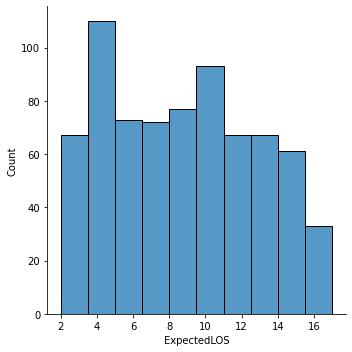

In [26]:
#16.Plot a graph to show the distribution of expected length of stay.

sns.displot(radm_reg['ExpectedLOS'],kde=False,bins=10) 

<AxesSubplot:>

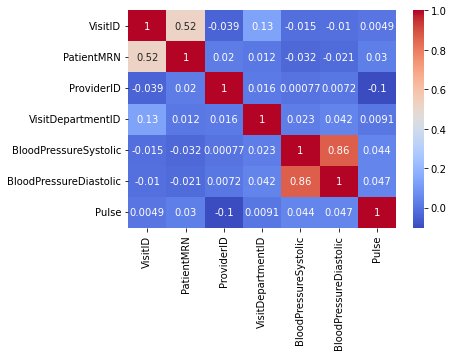

In [36]:
#17.Create a heat map to show the correlation between the column values of Ambulatory visits

tc=ambulatoryvisits.corr() 
sns.heatmap(tc,annot=True,cmap='coolwarm') 

In [28]:
#18. Add column 'Age' in Patient table
now = pd.Timestamp('now') 
patients['Dates'] = pd.to_datetime(patients['DateOfBirth']) 
patients['Age'] = (now - patients['Dates']).astype('<m8[Y]') 
patients

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age1,Dates
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0,76-100%,1960-01-01 00:00:00.000
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0,0-25%,1985-11-15 02:08:42.090
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,26-50%,1976-04-15 02:52:09.762
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0,51-75%,1968-10-15 03:32:13.635
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,76-100%,1962-05-01 19:12:58.950
...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36.0,0-25%,1986-05-26 00:01:19.761
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52.0,51-75%,1970-06-10 21:41:03.814
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39.0,0-25%,1983-01-08 21:49:27.884
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59.0,76-100%,1963-06-05 07:57:05.569


In [29]:
#19. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.
#df1=pd.DataFrame({'DATE':pd.to_datetime(radm_reg['DischargeDate']).dt.date,'TIME':pd.to_datetime(radm_reg['DischargeDate']).dt.
#time}) 
df1=pd.DataFrame({'DATE':radm_reg['DischargeDate'].dt.date,'TIME':radm_reg['DischargeDate'].dt.time}) 
df1

,DATE,TIME
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


In [30]:
# 20. Count of patients admitted based on Primary Diagnosis and Service provided.
radm_reg.groupby(['Service','PrimaryDiagnosis']).size() 

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

In [31]:
#21. Which demographic patients are prone to get stroke
a=radm_reg[radm_reg['PrimaryDiagnosis']=='Stroke']['PatientID']
patients[patients['PatientID'].isin(a)].groupby(['Gender','Race','Language']).size().sort_values(ascending=False).head(1)


Gender  Race                    Language
Male    Black/African-American  English     18
dtype: int64

In [37]:
#22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

edvisits.groupby(['Acuity','EDDisposition']).size().to_frame() 

0
Acuity EDDisposition     
1      Admitted        32
       Discharged     558
2      Admitted       116
       Discharged      66
3      Admitted        81
4      Admitted       107
       Discharged      30
5      Admitted       179
       Discharged      30

In [38]:
#23.Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list).
def center_element(list):
     r=int(len(list)/2)
     if(len(list)%2 == 0):
         return list[r-1:r+1]
     else:
         return list[r]
b='njjk nknk nk'
center_element(b)
c='abcde'
center_element(c)

'c'

In [39]:
# 24. Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

edvisits.groupby(['ReasonForVisit','EDDisposition']). size().unstack() 

EDDisposition,Admitted,Discharged
ReasonForVisit,,
Accident,39.0,NaN
Bleeding,16.0,15.0
Car Accident,17.0,NaN
Chest Pain,94.0,15.0
Cough,NaN,1.0
Fever,46.0,188.0
Gun Shot,16.0,NaN
Intoxication,NaN,30.0
Laceration,NaN,30.0


<AxesSubplot:xlabel='VisitDepartmentID', ylabel='count'>

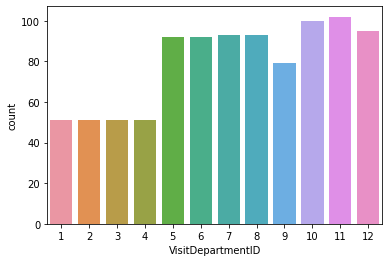

In [40]:
#25. Plot a graph by counting the no. of patients in each department.
sns.countplot(x='VisitDepartmentID',data=ambulatoryvisits)

In [41]:
#26. Using Arrays and Loops, find the count of patients based on gender.
arr=patients['Gender'] 
male=0
female=0
for i in arr:
    if(i=='Male'):
        male+=1
    elif(i=='Female'):
        female+=1
    else:
        continue
print(male,female) 

537 408


<AxesSubplot:xlabel='DischargeDisposition', ylabel='PatientID'>

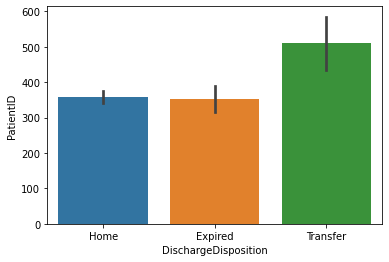

In [42]:
#27. Plot a graph to count the patients based on discharge disposition.
sns.barplot(x='DischargeDisposition',y='PatientID', data=radm_reg)

In [43]:
#28. Which reason of visit has maximum mortality rate.
df1=discharges.groupby(['DischargeDisposition']).size() 
df2 = df1['Expired']/(discharges['ExpectedMortality']. sum())
df3 = edvisits.groupby(['ReasonForVisit']).size()
df4 = round(df2 * df3,2) 
df4.idxmax

<bound method Series.idxmax of ReasonForVisit
Accident               16.66
Bleeding               13.25
Car Accident            7.26
Chest Pain             46.57
Cough                   0.43
Fever                  99.98
Gun Shot                6.84
Intoxication           12.82
Laceration             12.82
Migraine               66.65
Pneumonia              85.88
Shortness of Breath    63.66
Stomach Ache           79.47
dtype: float64>

In [44]:
#29. Calculate average LOS.
discharges['Actual_los'] = (discharges['DischargeDate'] - discharges['AdmissionDate']).astype('<m8[D]')
discharges['Actual_los'].mean()



9.534722222222221

In [45]:
#30.Which patientid has most entries in readmission registry.
radm_reg['PatientID'].mode() 

0    23
Name: PatientID, dtype: int64

In [46]:
#31. Find count of White Spanish Male.
df=patients
(df[(df['Gender']=='Male') & (df['Race']== 'White') & (df['Language'] == 'Spanish')]).shape[0] 

15

In [50]:
#32.If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.
Pat = patients.copy()
Pat['Name'] = patients['FirstName']+" "+ patients['LastName']
Pat['Name']

for i in ('Male','Female'):
    if i=='Female':
        Pat['Full_name']= 'Mr.'+Pat["Name"].map(str)
    else:
        Pat['Full_name']= 'Ms.'+Pat["Name"].map(str)
    
Pat

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age1,Dates,Name,Full_name
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0,76-100%,1960-01-01 00:00:00.000,Lanni Sue,Mr.Lanni Sue
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0,0-25%,1985-11-15 02:08:42.090,Far Myers,Mr.Far Myers
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,26-50%,1976-04-15 02:52:09.762,Devlin Michael,Mr.Devlin Michael
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0,51-75%,1968-10-15 03:32:13.635,Carmine Texas,Mr.Carmine Texas
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,76-100%,1962-05-01 19:12:58.950,Tann Bama,Mr.Tann Bama
...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36.0,0-25%,1986-05-26 00:01:19.761,Wat Fideler,Mr.Wat Fideler
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52.0,51-75%,1970-06-10 21:41:03.814,Wandie Baythrop,Mr.Wandie Baythrop
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39.0,0-25%,1983-01-08 21:49:27.884,Diahann Smeeton,Mr.Diahann Smeeton
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59.0,76-100%,1963-06-05 07:57:05.569,Panchito Sharple,Mr.Panchito Sharple


<AxesSubplot:xlabel='Service'>

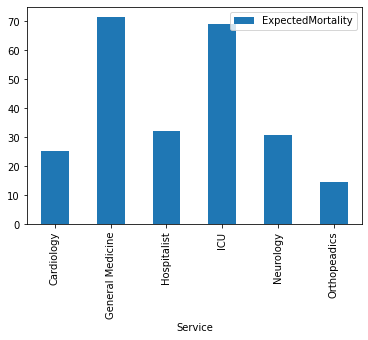

In [48]:
#33. Using a bar chart, which Service had the lowest count of Expected Mortality?
radm_reg.groupby("Service").agg({"ExpectedMortality":'sum'}).plot(kind='bar')

In [51]:
#34. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.
a= np.arange(1,31).reshape(6,5)
a[2:4,0:2] 

array([[11, 12],
       [16, 17]])

In [52]:
#35. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.
a[[0,1,2,3],[1,2,3,4]] 

array([ 2,  8, 14, 20])

In [53]:
#36. Create a correlation matrix on EDVisits
cm=edvisits.corr()
cm

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


In [54]:
#37. Write a function to print all the upper case letter of a given sentence.
def myfunc(s):
    l=list(s)
    for i in l:
        if(i.isupper()):
             print (i)
myfunc('Hello You Are The BEST')


H
Y
A
T
B
E
S
T


In [55]:
#38. Number of patients on 'Transfer' based on primary diagnosis.
discharges[discharges['DischargeDisposition'] =='Transfer'].groupby(['PrimaryDiagnosis'])['DischargeDisposition'].count() 

PrimaryDiagnosis
Afib                1
Diabetes            7
Flu                 2
Heart Failure       9
Knee Replacement    1
Laceration          1
Pain                1
Pneumonia           8
Stroke              9
Name: DischargeDisposition, dtype: int64

In [56]:
#39. Get the FirstName, LastName,DateOfBirth of the Patients whose reason for visit is Migraine.
#Use EDUnique Sheet for reason for visit.
df1=edunique.set_index('PatientID') 
df2=patients.set_index('PatientID')
dfFilter= pd.concat([df1,df2],axis=1) 
dfFilter[dfFilter['ReasonForVisit']=='Migraine'][['FirstName','LastName','DateOfBirth','ReasonForVisit']]


,FirstName,LastName,DateOfBirth,ReasonForVisit
PatientID,,,,
12,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
14,Gan,Yu,1970-06-02 06:22:54.675,Migraine
3,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
22,Joesph,Long,1979-12-04 16:45:56.080,Migraine
24,Gabriel,Joseph,1986-05-31 09:36:05.716,Migraine
...,...,...,...,...
870,Hauck,Rubbens,1963-11-16 03:31:38.929,Migraine
897,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
908,Knox,Group,1975-08-25 22:27:50.177,Migraine


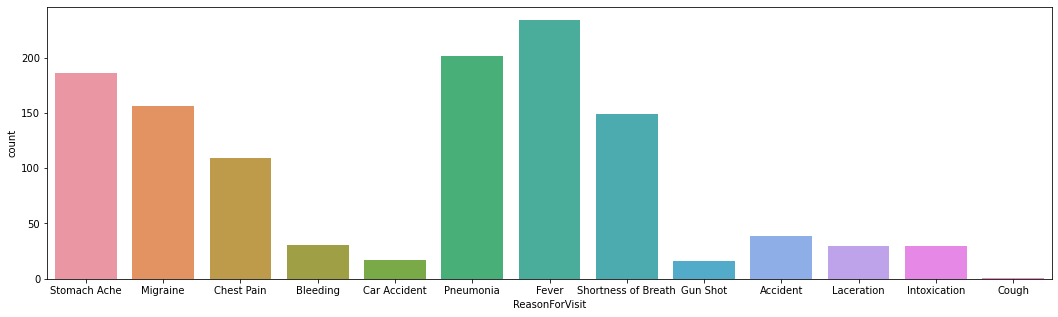

In [57]:
#40. Plot a graph showing the count of patients for the reason visited the hospital.
plt.figure(figsize=(18,5)) 
var = sns.countplot(x="ReasonForVisit",data=edvisits) 

In [58]:
#41. Find the visit type with maximum 'No Show'.
visitype=  ambulatoryvisits[ambulatoryvisits['VisitStatus']=='No Show'].groupby(['VisitType'])['VisitStatus'].count().idxmax()
#max_count["visitType"].value_counts()[:1]

visitype

'Telemedicine'

In [59]:
#42. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.
providers.loc[((providers['ProviderID'].isin(range(11,21))) & (providers['ProviderSpecialty']=='Surgery') )]

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


In [60]:
#43.In question 34, when the value is less than 6, print as -1,else print 99.
#np where()
a = np.arange(1,31).reshape((6, 5))
print(a)
print(np.where(a < 6, -1, 99))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
[[-1 -1 -1 -1 -1]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]
 [99 99 99 99 99]]


In [61]:
#44.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.
pd.pivot_table(radm_reg,index='Service',columns='PrimaryDiagnosis',values='ExpectedLOS')

PrimaryDiagnosis,AMI,Afib,Broken Leg,Diabetes,Fever,Flu,Heart Failure,Hip Fracture,Hypertension,Kidney Failure,Knee Replacement,Laceration,Migraine,Pain,Pneumonia,Spinal Cord Injury,Stroke
Service,,,,,,,,,,,,,,,,,
Cardiology,12.414202,13.162920,3.911826,NaN,NaN,3.970428,13.014044,NaN,NaN,6.580273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
General Medicine,NaN,NaN,3.368132,5.665298,6.803796,6.141753,NaN,NaN,5.369365,5.943163,NaN,6.771154,NaN,NaN,6.140270,NaN,7.173333
Hospitalist,13.828290,NaN,7.125069,7.874359,8.865651,7.033979,NaN,NaN,7.864913,7.850346,2.255705,7.069360,NaN,NaN,8.146240,NaN,15.349671
ICU,12.503213,9.651522,NaN,NaN,3.860693,4.953871,12.784620,NaN,5.092533,9.045995,NaN,10.101443,NaN,NaN,13.523626,15.27654,13.297978
Neurology,10.482847,NaN,NaN,NaN,NaN,6.700593,12.737565,NaN,4.276454,NaN,NaN,NaN,12.202213,11.441453,7.527330,NaN,12.745608
Orthopeadics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.474971,NaN,NaN,3.702839,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# 45. Calculate mortality by diagnosis.
discharges[discharges['DischargeDisposition']=='Expired'].groupby('PrimaryDiagnosis').size()

PrimaryDiagnosis
AMI                    6
Afib                   4
Broken Leg             3
Diabetes               9
Fever                  4
Flu                   11
Heart Failure         16
Hip Fracture           3
Hypertension          16
Kidney Failure         2
Knee Replacement       2
Laceration             2
Pain                   1
Pneumonia             16
Spinal Cord Injury     2
Stroke                 7
dtype: int64

In [63]:
#46.Write a code to split a sentence into words using regex.
re.split(r'\s+',"This code will split the sentence into words. The more sentences, the more splits.")

['This',
 'code',
 'will',
 'split',
 'the',
 'sentence',
 'into',
 'words.',
 'The',
 'more',
 'sentences,',
 'the',
 'more',
 'splits.']

In [64]:
#47. Using indexing ,loc ,retrieve the row with maximum BloodPressureSystolic.
ambulatoryvisits.loc[[ambulatoryvisits['BloodPressureSystolic'].idxmax()]]


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed


In [33]:
#48. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).
discharges['Actual_los'] = (discharges['DischargeDate'] - discharges['AdmissionDate']).astype('<m8[D]') 
discharges.groupby(['Service','DischargeDisposition'])['Actual_los'].mean()



Service           DischargeDisposition
Cardiology        Expired                  8.866667
                  Home                    10.186667
                  Transfer                11.200000
General Medicine  Expired                  8.500000
                  Home                     9.772926
                  Transfer                10.687500
Hospitalist       Expired                 10.000000
                  Home                     9.034091
                  Transfer                 8.666667
ICU               Expired                  9.275862
                  Home                     9.127273
                  Transfer                 8.833333
Neurology         Expired                 10.185185
                  Home                     9.194444
                  Transfer                12.000000
Orthopeadics      Expired                 11.800000
                  Home                     8.846154
                  Transfer                16.000000
Name: Actual_los, dtype: 

In [65]:
#49.Retrieve count of patient who are prone to Hypertension crisis (SBP>180 & DBP >120)

df= pd.read_excel("HospitalDatabase.xlsx",sheet_name="AmbulatoryVisits")
Count = print(((df["BloodPressureSystolic"] >= 180) & (df["BloodPressureDiastolic"] >= 120)).sum())


110


In [67]:
#50. Which departmentID has maximum number of visits scheduled.
ambulatoryvisits.groupby(['VisitDepartmentID'])[['VisitID']].count().idxmax()

VisitID    11
dtype: int64

In [68]:
# 51.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.
edvisits[(edvisits["ReasonForVisit"].isin(["Migraine", "Pneumonia"])) & (edvisits["Acuity"] >= 2)]


,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
1107,1027,773,2020-01-13 15:27:07.001,2020-01-14 13:27:31.778,2,Migraine,Discharged
1150,1104,850,2020-01-14 10:46:08.650,2020-01-14 20:52:26.031,2,Migraine,Discharged
1152,1106,852,2020-01-14 11:19:41.401,2020-01-15 02:47:17.353,2,Migraine,Discharged
1160,1122,868,2020-01-14 15:05:58.777,2020-01-15 13:53:02.550,2,Migraine,Discharged


In [69]:
# 52.Retrieve the row with minimum DBP using sorting technique.
ambulatoryvisits.sort_values(by='BloodPressureDiastolic').head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


In [81]:
# 53.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.
edvisit = pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDVisits")
df_ed = edvisit[["ReasonForVisit"]]

#Getting the Reason for Visit from the user
user_input = input("Enter the reason for visit: ")

#Checking the condition and displaying the count
ed = df_ed.loc[df_ed["ReasonForVisit"] == user_input].count()
display(ed)


Enter the reason for visit: Bleeding


ReasonForVisit    31
dtype: int64

In [82]:
# 54. Mortality O.E
a=discharges.groupby(['DischargeDisposition']).size()
a['Expired']/(discharges['ExpectedMortality'].sum())

0.4272709474250124

<BarContainer object of 720 artists>

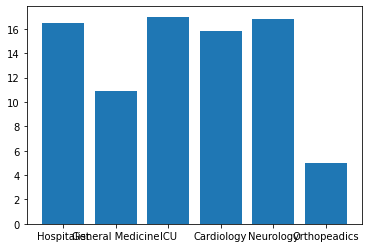

In [83]:
# 55.Create a bar chart on service & expected length of stay.
plt.bar(radm_reg['Service'], radm_reg['ExpectedLOS'])

In [84]:
# 56.Count of canceled status.
(ambulatoryvisits['VisitStatus']=='Canceled').sum()

60

In [85]:
# 57. Find the age prone to get stroke.
dfMerge=pd.merge(patients,discharges, on='PatientID')
now = pd.Timestamp('now')
dfMerge['Dates'] = pd.to_datetime(dfMerge['DateOfBirth'])  
dfMerge['Age'] = (now - dfMerge['Dates']).astype('<m8[Y]')   
dff = dfMerge[dfMerge['PrimaryDiagnosis'] == 'Stroke'].groupby(dfMerge['Age'])['PatientID'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
dff

,Age,Count
23,61.0,6
21,58.0,6
4,40.0,5
10,47.0,4
11,48.0,4
20,57.0,4
2,38.0,3
3,39.0,3
6,42.0,3
7,44.0,3


In [86]:
# 58.Display total count of patients service wise based on gender.

df2=pd.merge(patients,discharges, on='PatientID')
df2
df2.groupby(['Service','Gender'])['Gender'].count()

Service           Gender
Cardiology        Female     41
                  Male       54
General Medicine  Female    114
                  Male      149
Hospitalist       Female     35
                  Male       66
ICU               Female     65
                  Male       86
Neurology         Female     34
                  Male       31
Orthopeadics      Female     22
                  Male       23
Name: Gender, dtype: int64

In [87]:
# 59.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.
pd.DataFrame(providers['ProviderName'].str.split().to_list(),columns=['Prov_first_name','Prov_last_name'])


,Prov_first_name,Prov_last_name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


In [91]:
#60.Find the list of patients whose ExpectedLOS is greater than the value given by the user.
readmregistry = pd.read_excel("HospitalDatabase.xlsx",sheet_name="ReAdmissionRegistry")

#get the expected LOS value from the user
user_input = float(input("Enter the Expected LOS value: "))

#Filtering only the patients with Expected LOS greater than user input.
df_patlist = readmregistry[["PatientID","ExpectedLOS"]]
filt_list = df_patlist.loc[df_patlist["ExpectedLOS"] > user_input]
display(filt_list)


Enter the Expected LOS value: 5


,PatientID,ExpectedLOS
0,1,6.717771
4,6,13.650953
5,7,9.555047
6,8,16.472257
7,9,9.646857
...,...,...
712,735,8.322151
714,737,10.563688
715,738,13.725405
716,739,11.355456


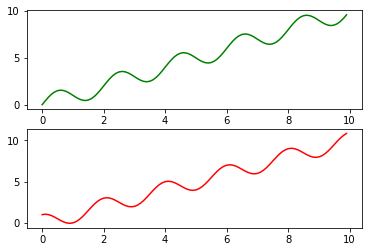

In [93]:
#61. Plot a graph by multiplotting on the same canvas . (Take any set of x & y values)
ax1=plt.subplot(211) #There are 2 rows, 1 column, first graph
ax2=plt.subplot(212) #There are 2 rows, 1 column, Second graph
x = np.arange(0, 10, 0.1) 
y1 = np.sin(np.pi * x) + x 
y2= np.cos(np.pi * x) + x 
ax1.plot(x,y1, color='g') 
ax2.plot(x,y2, color='r') 
plt.show() 

In [94]:
#62.Display the data for all 'White Female' patients above the age of 50.
now = pd.Timestamp('now') 
patients['Dates'] = pd.to_datetime(patients['DateOfBirth']) 
patients['Age'] = (now - patients['Dates']).astype('<m8[Y]')
#condition1 = (patients['Gender'] == "Female") 
#condition2 = (patients['Age'] > 40) 
patients1 = (patients['Gender'] == "Female") & (patients['Age'] > 50) & (patients['Race'] == 'White') 
patients = patients[patients1] 
patients

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age1,Dates
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,55.0,51-75%,1967-12-09 05:01:37.892
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,62.0,76-100%,1960-10-08 01:42:51.212
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,62.0,76-100%,1960-11-28 18:05:11.459
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56.0,51-75%,1966-04-14 06:01:07.169
39,40,Christian,Pow,1971-12-07 11:47:43.885,Female,White,Spanish,51.0,51-75%,1971-12-07 11:47:43.885
...,...,...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,52.0,51-75%,1970-12-09 04:49:48.933
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55.0,51-75%,1967-03-10 08:18:47.908
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53.0,51-75%,1969-08-15 11:05:30.165
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,59.0,76-100%,1963-11-16 03:31:38.929


In [98]:
#63.Find the maximum expired patients based on Primary Diagnosis
df = pd.read_excel("HospitalDatabase.xlsx",sheet_name="Discharges")
df_DD = df.loc[df.DischargeDisposition == "Expired"]
Max_PD = df_DD['PrimaryDiagnosis'].max()
print('The maximum expired patients - ',Max_PD)


The maximum expired patients -  Stroke


In [99]:
#64.Using numpy functions, multiply the following arrays
#a=np.arange(6).reshape(2,3)
#b=np.arange(6).reshape(3,2)
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2) 
np.matmul(a,b)

array([[10, 13],
       [28, 40]])

In [100]:
#65. Get the count of number of patients discharged based on service and primary diagnosis.

discharges.groupby(['Service','PrimaryDiagnosis']). size().to_frame() 

0
Service          PrimaryDiagnosis      
Cardiology       AMI                 40
                 Afib                10
                 Broken Leg           3
                 Flu                  2
                 Heart Failure       39
                 Kidney Failure       1
General Medicine Broken Leg           3
                 Diabetes            38
                 Fever               13
                 Flu                 54
                 Hypertension        35
                 Kidney Failure      12
                 Laceration          21
                 Pneumonia           67
                 Stroke              20
Hospitalist      AMI                  1
                 Broken Leg           3
                 Diabetes            26
                 Fever                3
                 Flu                 19
                 Hypertension         6
                 Kidney Failure       6
                 Knee Replacement     1
                 Laceration           7
                 Pneumonia           28
                 Stroke               1
ICU              AMI                  5
                 Afib                 1
                 Fever                3
                 Flu                  3
                 Heart Failure       33
                 Hypertension         4
                 Kidney Failure       1
                 Laceration           1
                 Pneumonia           77
                 Spinal Cord Injury   2
                 Stroke              21
Neurology        AMI                  2
                 Flu                  2
                 Heart Failure        6
                 Hypertension         5
                 Migraine            12
                 Pain                 7
                 Pneumonia            5
                 Stroke              26
Orthopeadics     Hip Fracture        23
                 Knee Replacement    22

In [101]:
#66. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30
a=np.arange(1,31).reshape(6,5)
a[[0,4,5],3:] 

array([[ 4,  5],
       [24, 25],
       [29, 30]])

In [102]:
#67.Make a pivot table by counts the no. of patients from the admission date till discharge date.
radm_reg.pivot_table(index='AdmissionDate', columns='DischargeDate',values='PatientID') 

DischargeDate,2018-01-04 19:59:31.391,2018-01-04 21:28:51.898,2018-01-04 22:28:23.672,2018-01-05 02:40:20.756,2018-01-05 05:47:04.933,2018-01-05 14:18:30.029,2018-01-06 13:01:00.276,2018-01-07 03:01:21.623,2018-01-07 03:35:49.426,2018-01-07 15:39:25.987,...,2018-03-08 00:24:13.535,2018-03-08 02:43:18.749,2018-03-08 09:17:08.227,2018-03-08 09:27:18.377,2018-03-08 12:58:46.999,2018-03-09 00:57:07.978,2018-03-09 07:07:45.088,2018-03-09 07:37:01.872,2018-03-10 06:06:12.068,2018-03-10 20:38:30.568
AdmissionDate,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.0,2.0,3.0,NaN,5.0,6.0,7.0,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,21.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#68.Display the data where actual LOS is greater than expected LOS
discharges['Actual_los'] = (discharges['DischargeDate'] - discharges['AdmissionDate']).astype('<m8[D]')
discharges[discharges['Actual_los'] > discharges['ExpectedLOS']] 

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,Actual_los
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12.0
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8.0
5,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976,15.0
6,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923,9.0
7,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274,12.0
...,...,...,...,...,...,...,...,...,...,...
712,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691,6.0
713,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570,8.0
714,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036,11.0
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13.0


In [104]:
#69. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.
patients[(patients['FirstName'].str.contains(pat='lau', case=False)) | (patients['LastName'].str.contains
(pat='lau',case=False))]
patients[(patients['FirstName']. str.contains(pat='lau',case=False)) | (patients['LastName'].str.contains(pat='lau',case=False))]


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age1,Dates
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English,62.0,76-100%,1960-06-23 20:07:53.045
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English,53.0,51-75%,1969-03-16 07:48:49.338
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English,61.0,76-100%,1961-10-02 08:24:17.334
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English,57.0,76-100%,1965-06-22 02:49:28.667
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English,55.0,51-75%,1967-04-02 07:17:53.635
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English,52.0,51-75%,1970-05-17 08:09:28.988


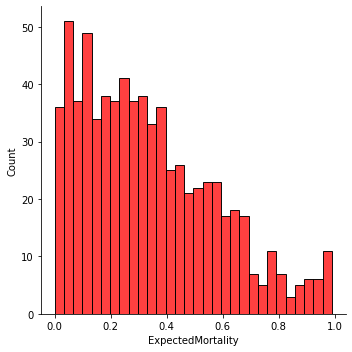

In [105]:
#70. Plot a graph to show the distribution of expected mortality.
sns.displot(radm_reg['ExpectedMortality'],bins=30,kde=False, color='red') 

<AxesSubplot:xlabel='PrimaryDiagnosis', ylabel='count'>

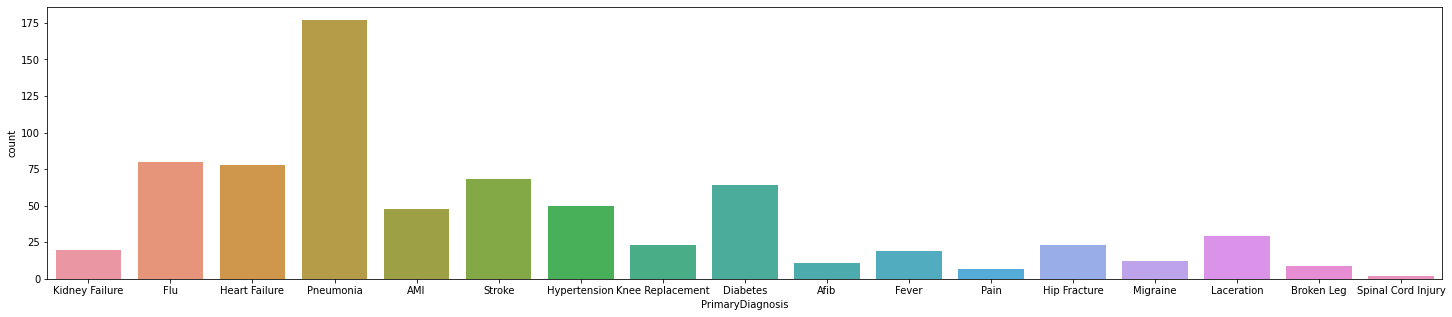

In [106]:
#71. Create a visualization on the count the no. of patients based on primary diagnosis.
plt.figure(figsize=(25,5)) 
sns.countplot(x='PrimaryDiagnosis',data=radm_reg) 


In [145]:
#72.List male patients over the age of 60 who have undergone surgery from January-March 2019.
dfPA = pd.merge(patients,ambulatoryvisits, left_on= 'PatientID', right_on = 'PatientMRN') #dfPA
dfPAP = pd.merge(dfPA,providers, on= 'ProviderID') #dfPAP
now = pd.Timestamp('now') 
dfPAP['Dates'] = pd.to_datetime(dfPAP['DateOfBirth']) 
dfPAP['Age'] = (now - dfPAP['Dates']).astype('<m8[Y]') 
dfPAP1 = (dfPAP['Gender'] == "Male") & (dfPAP['Age'] > 60) & (dfPAP['ProviderSpecialty'] == 'Surgery') & (dfPAP['DateScheduled'] >= '2019-01-01') & (dfPAP
['DateScheduled'] <= '2019-03-31')
dfPAP = dfPAP[dfPAP1] 
dfPAP.head(5)


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age1,Dates,...,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,ProviderName,ProviderSpecialty,ProviderDateOnStaff


In [108]:
#73. Delete the column 'DischargeDispostion' iteratively.
df=discharges
for col in df.columns:
     if 'DischargeDisposition' in col:
             del df[col] 
print(df) 


     AdmissionID  PatientID AdmissionDate           DischargeDate  \
0              1          9    2018-01-01 2018-01-07 18:06:06.408   
1            257         93    2018-01-06 2018-01-18 02:59:04.667   
2            152        101    2018-01-07 2018-01-11 16:16:06.782   
3            361        102    2018-01-07 2018-01-15 04:48:33.134   
4            258        103    2018-01-07 2018-01-15 13:32:36.157   
..           ...        ...           ...                     ...   
715          715        716    2018-02-21 2018-03-06 03:31:05.262   
716          698        723    2018-02-22 2018-02-26 15:09:02.584   
717          704        724    2018-02-22 2018-02-27 07:59:32.385   
718          716        733    2018-02-22 2018-03-05 12:31:55.958   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

              Service PrimaryDiagnosis  ExpectedLOS  ExpectedMortality  \
0          Cardiology              AMI     9.646857           0.061540   
1          Cardiology  

In [109]:
# 74.Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question) 
import psycopg2

conn = psycopg2.connect(
   database="HospitalDB_New", user='postgres', password='SQL123', host='::1', port= 5432
)
cursor = conn.cursor()
sql_command = '''Select distinct extract (year from "DateofVisit" ) AS "Year" from public."AmbulatoryVisits"
'''

cursor.execute(sql_command)
print(cursor.fetchall())
conn.commit()
cursor.close()
conn.close()

OperationalError: connection to server at "::1", port 5432 failed: FATAL:  password authentication failed for user "postgres"


In [110]:
#75. Calculate the time spent in ED Department for each visit.
edvisits['EDDischargeTime']-edvisits['VisitDate']


0      0 days 11:20:22.924000
1      0 days 23:14:20.215000
2      0 days 01:50:56.151000
3      0 days 01:20:09.793000
4      0 days 02:38:20.043000
                ...          
1194   0 days 15:53:09.453000
1195   0 days 22:27:04.030000
1196   0 days 04:30:03.545000
1197   0 days 06:10:35.054000
1198   0 days 10:49:26.581000
Length: 1199, dtype: timedelta64[ns]

In [146]:
#76. Find the last name of the patients, by getting the first name from the user.
print("running")
for (index,row) in patients.iterrows():
    #print(index)
   # print(row.FirstName)
    if row.FirstName == "Silvester":
        print(row.LastName)


running
Restaurant


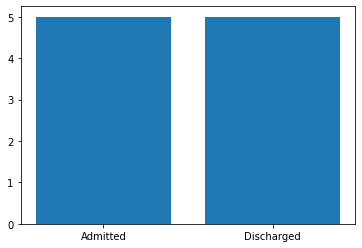

In [117]:
#77.Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates)
#& make the hatchs onto the bar by using set_hatch() method.
eddisposition=edvisits['EDDisposition'] 
acuity=edvisits['Acuity'] 
bar=plt.bar(eddisposition,acuity) 
bar[0].set_hatch('/') 
bar[1].set_hatch('o') 

In [118]:
# 78.Find reasonForVisit with highest count of acuity 5 patients.
edvisits[edvisits['Acuity']==5].groupby('ReasonForVisit').size().idxmax()


'Chest Pain'

In [119]:
#79. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?
grouped=radm_reg.groupby('PrimaryDiagnosis').agg({'ExpectedLOS':['min','max']})
(grouped.iloc[:,1] - grouped.iloc[:,0]).sort_values(ascending=False).head()

PrimaryDiagnosis
Pneumonia     14.834260
Stroke        12.623497
Flu            8.876980
Laceration     8.805804
Diabetes       8.773368
dtype: float64

In [120]:
#80.Write a code snippet to print different ProviderSpeciality ( use groupby and get the list of the groups)


for i in providers.groupby('ProviderSpecialty').groups:
     print (i) 

Cardiology
Pediatrics
PrimaryCare
Surgery
